In [1493]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [315]:
df = pd.read_csv(r"C:\Users\minso\OneDrive\Desktop\churn.csv", index_col='RowNumber')

In [3]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [33]:
not_churn_df = df[df['Exited'] == 0]
churn_df = df[df['Exited'] == 1]

In [4]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-oaoaaychbs")

In [ ]:
from mitosheet import *; register_analysis("id-oaoaaychbs");
    
# Filtered Exited
df = df[df['Exited'] == 1]

# Renamed columns Age2
df.rename(columns={'Age': 'Age2'}, inplace=True)


In [6]:
df.describe()

CustomerId  CreditScore          Age       Tenure        Balance  \
count  7.963000e+03  7963.000000  7963.000000  7963.000000    7963.000000   
mean   1.569117e+07   651.853196    37.408389     5.033279   72745.296779   
std    7.174423e+04    95.653837    10.125363     2.880658   62848.040701   
min    1.556570e+07   405.000000    18.000000     0.000000       0.000000   
25%    1.562882e+07   585.000000    31.000000     3.000000       0.000000   
50%    1.569154e+07   653.000000    36.000000     5.000000   92072.680000   
75%    1.575335e+07   718.000000    41.000000     7.000000  126410.280000   
max    1.581569e+07   850.000000    92.000000    10.000000  221532.800000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count    7963.000000  7963.000000     7963.000000      7963.000000  7963.0  
mean        1.544267     0.707146        0.554565     99738.391772     0.0  
std         0.509536     0.455101        0.497045     57405.586966     0.0  
min         1.000000     0.000000        0.000000        90.070000     0.0  
25%         1.000000     0.000000        0.000000     50783.490000     0.0  
50%         2.000000     1.000000        1.000000     99645.040000     0.0  
75%         2.000000     1.000000        1.000000    148609.955000     0.0  
max         3.000000     1.000000        1.000000    199992.480000     0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 2 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       7963 non-null   int64  
 1   Surname          7963 non-null   object 
 2   CreditScore      7963 non-null   int64  
 3   Geography        7963 non-null   object 
 4   Gender           7963 non-null   object 
 5   Age              7963 non-null   int64  
 6   Tenure           7963 non-null   int64  
 7   Balance          7963 non-null   float64
 8   NumOfProducts    7963 non-null   int64  
 9   HasCrCard        7963 non-null   int64  
 10  IsActiveMember   7963 non-null   int64  
 11  EstimatedSalary  7963 non-null   float64
 12  Exited           7963 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 871.0+ KB


In [8]:
df.shape

(7963, 13)

In [9]:
df['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [10]:
df['Age'].sort_values(ascending=True).unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

In [11]:
Categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
Numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

## Univariate Analysis

In [12]:
df[Numerical_features].mean()

CreditScore          651.853196
Age                   37.408389
Tenure                 5.033279
Balance            72745.296779
NumOfProducts          1.544267
EstimatedSalary    99738.391772
dtype: float64

In [13]:
df[Numerical_features].std()

CreditScore           95.653837
Age                   10.125363
Tenure                 2.880658
Balance            62848.040701
NumOfProducts          0.509536
EstimatedSalary    57405.586966
dtype: float64

In [14]:
df[Numerical_features].var()

CreditScore        9.149657e+03
Age                1.025230e+02
Tenure             8.298189e+00
Balance            3.949876e+09
NumOfProducts      2.596265e-01
EstimatedSalary    3.295401e+09
dtype: float64

In [15]:
df[Numerical_features].median()

CreditScore          653.00
Age                   36.00
Tenure                 5.00
Balance            92072.68
NumOfProducts          2.00
EstimatedSalary    99645.04
dtype: float64

In [27]:
geography = ['France', 'Germany', 'Spain']
count = [5014, 2509, 2477]
no_churn = [4204, 1695, 2064]
churn = [810, 814, 413]
gender_count = [1139, 898]
gender = ['Male', 'Female']

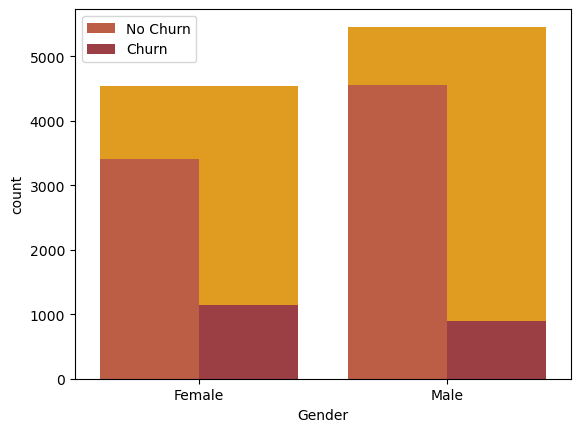

In [1693]:
sns.countplot(x=df['Gender'], color='#ffa600')
sns.countplot(x=df['Gender'], hue=df['Exited'], palette=['#d05231','#ab3037'])
plt.legend( labels=['_', 'No Churn', 'Churn'])
plt.show()

### Insights
There are more males than females. However, more females left the bank than males.

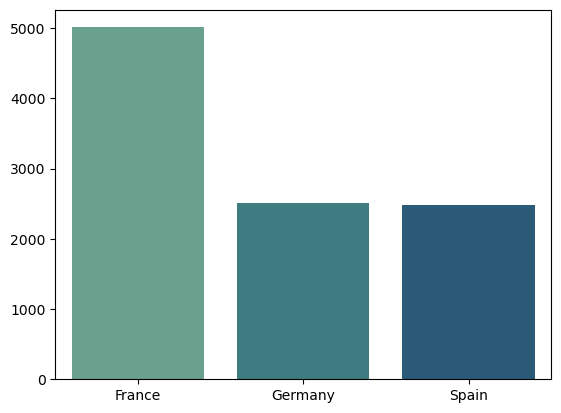

In [1544]:
sns.barplot(x=geography, y=count, palette='crest')
plt.show()

In [1582]:
colors = ['#ffa600', '#ff6a50', '#ed4586']
colors2 = ['#ed4586', '#a44aa9', '#2f52aa']

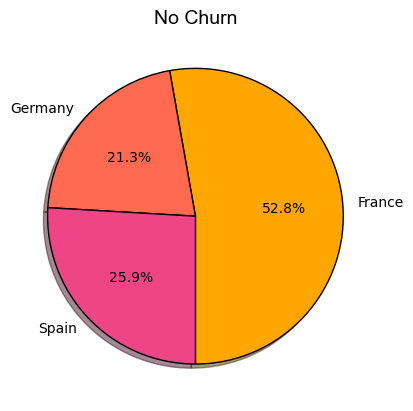

In [1590]:
plt.pie(no_churn, labels=geography, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270, wedgeprops = {'edgecolor':'black', 'antialiased':True})
plt.title('No Churn', font='Arial', fontsize=14)
plt.show()

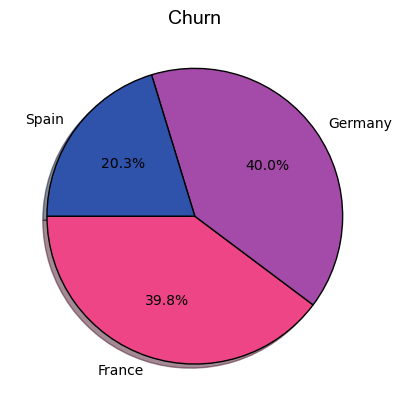

In [1591]:
plt.pie(churn, labels=geography, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=180, wedgeprops = {'edgecolor':'black', 'antialiased':True})
plt.title('Churn', font='Arial', fontsize=14)
plt.show()

### Insights
The greatest number of people that chose this bank are from France. However, more people in Germany left the bank.

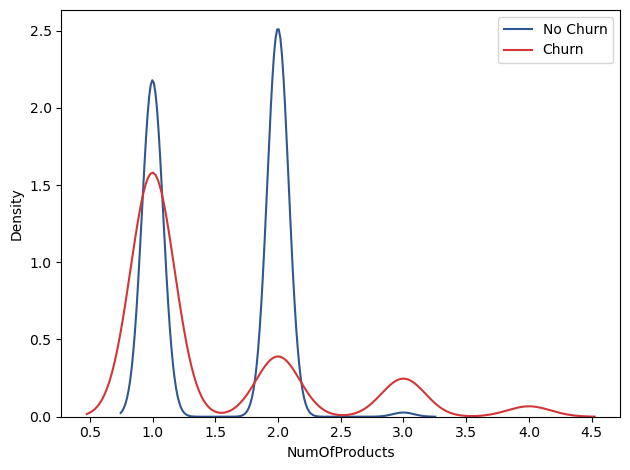

In [1650]:
sns.kdeplot(not_churn_df['NumOfProducts'], label='Not Exited', color='#30578f')
sns.kdeplot(churn_df['NumOfProducts'], label='Exited', color='#d23636')
plt.legend(labels=['No Churn', 'Churn'])
plt.tight_layout()

### Insights
More people are likely to leave the bank when they bought one product from the bank. The number of people that will leave the bank drastically decreases when they have 2 products.

Those who have bought 3 or 4 products will certainly churn.

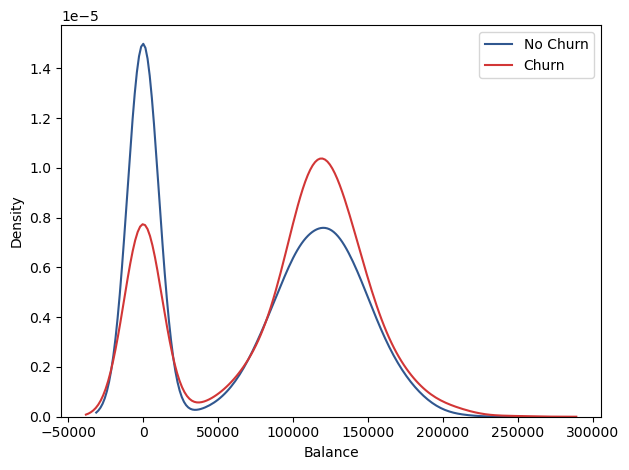

In [1651]:
sns.kdeplot(not_churn_df['Balance'], label='Not Exited', color='#30578f')
sns.kdeplot(churn_df['Balance'], label='Exited', color='#d23636')
plt.legend(labels=['No Churn', 'Churn'])
plt.tight_layout()

### Insights
People that did not leave any balance inside their bank account are less likely to churn compared to those that left more balance inside their bank account. 
Most people will churn if they have about $125000 in their bank account.

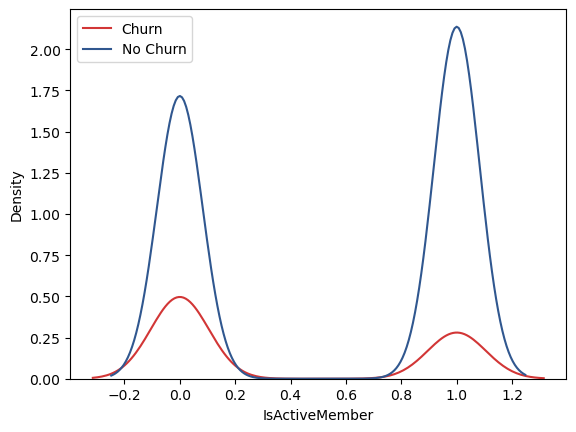

In [1681]:
sns.kdeplot(x=df['IsActiveMember'], hue=df['Exited'], palette=['#30578f','#d23636'])
plt.legend(labels=['Churn', 'No Churn'])

### Insights
Active members are less likely to churn.

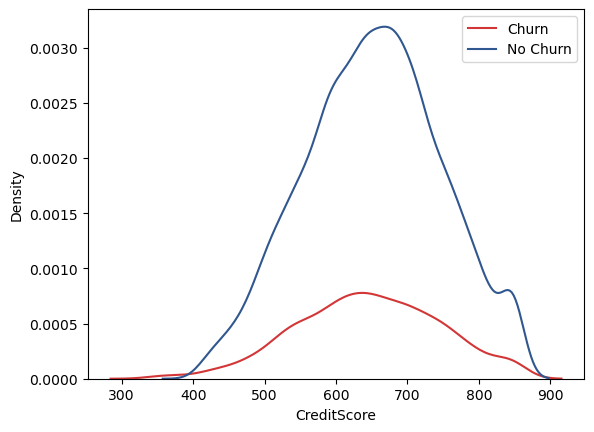

In [1674]:
sns.kdeplot(x=df['CreditScore'], hue=df['Exited'], palette=['#30578f', '#d23636'])
plt.legend(labels=['Churn', 'No Churn'])

### Insights
People who have very poor credit score of 300 to 400 are the most likely to churn whereas people with credit scores above 400 are less likely to churn. 

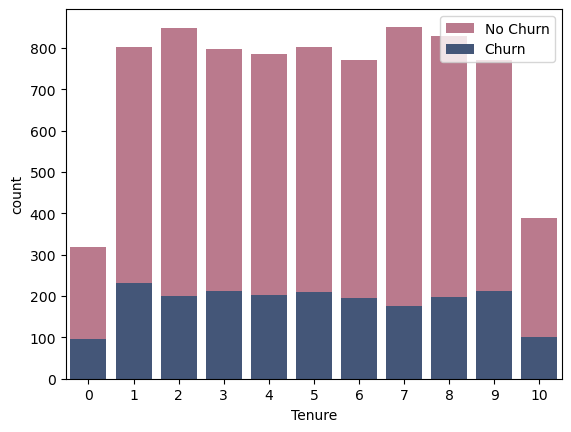

In [1695]:
sns.countplot(x=not_churn_df['Tenure'], color='#c56f89', label='No Churn')
sns.countplot(x=churn_df['Tenure'], color='#3b5381', label='Churn')
plt.legend()

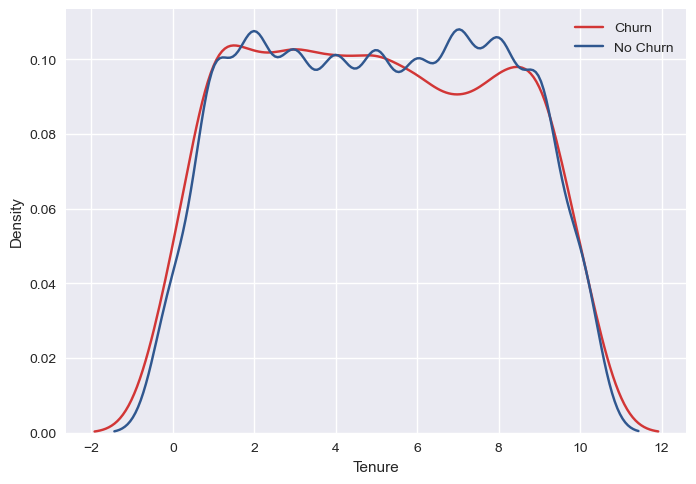

In [1714]:
sns.kdeplot(churn_df.Tenure, label='Exited', color='#d23636')
sns.kdeplot(not_churn_df.Tenure, label='Not Exited', color='#30578f')
plt.legend(labels=['Churn', 'No Churn'])
plt.show()

### Insights
Tenure of 6 to 8 years have the least likelihood of churn and Tenure of 1 year have the most likelihood of churn.
Overall, Short Tenure or Long Tenure does not have much impact on whether the people will churn or not churn.

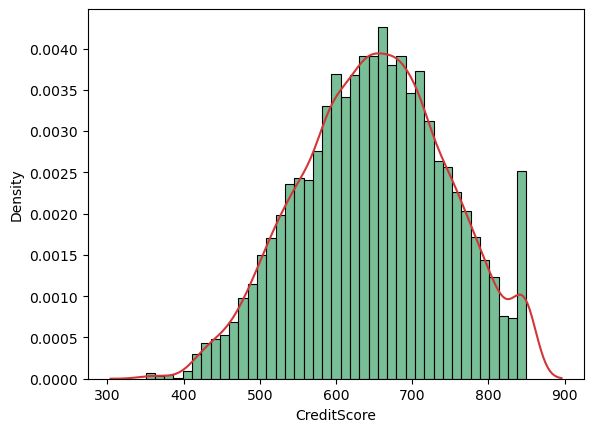

In [1633]:
sns.histplot(df['CreditScore'], stat='density', color='#4ba874')
sns.kdeplot(df['CreditScore'], color='#d23636')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

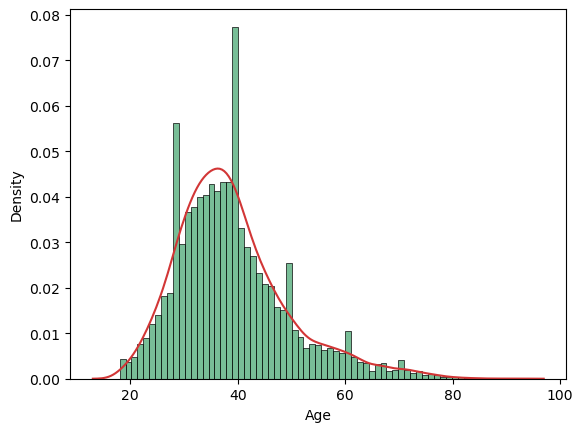

In [1631]:
sns.histplot(df['Age'], stat='density', color='#4ba874')
sns.kdeplot(df['Age'], color='#d23636')

In [1685]:
statistic, p = stats.shapiro(df['Age'][:100])
print(f"The p-value of df['Age'] for the sample size of 100 is {p}.") 
print(f"Since {p} is less than 0.05, the null hypothesis that the data are normally distributed is rejected.")

The p-value of df['Age'] for the sample size of 100 is 0.003093544626608491.
Since 0.003093544626608491 is less than 0.05, the null hypothesis that the data are normally distributed is rejected.


In [1686]:
statistic2, p2 = stats.shapiro(df['CreditScore'][:200])
print(f"The p-value of df['Age'] for the sample size of 200 is {p2}.") 
print(f"Since {p2} is less than 0.05, the null hypothesis that the data are normally distributed is rejected.")

The p-value of df['Age'] for the sample size of 200 is 0.02882959321141243.
Since 0.02882959321141243 is less than 0.05, the null hypothesis that the data are normally distributed is rejected.


In [1687]:
skew = df['Age'].skew()
print(f'Since the skewness is ({skew}) > 1, this indicates that the distribution is skewed right.')

Since the skewness is (1.0113202630234552) > 1, this indicates that the distribution is skewed right.


In [1688]:
kurt = df['Age'].kurt()
print(f'Since the kurtosis is ({kurt}) > 1, this indicates that the distribution is heavy-tailed.')

Since the kurtosis is (1.3953470615086956) > 1, this indicates that the distribution is heavy-tailed.


In [1689]:
skew2 = df['CreditScore'].skew()
print(f'Since the skewness is ({skew2}) < 1, this indicates that the distribution is skewed left.')

Since the skewness is (-0.07160660820092675) < 1, this indicates that the distribution is skewed left.


In [1690]:
kurt2 = df['CreditScore'].kurt()
print(f'Since the kurtosis is ({kurt2}) < 1, this indicates that the distribution is light-tailed.')

Since the kurtosis is (-0.42572568480291295) < 1, this indicates that the distribution is light-tailed.


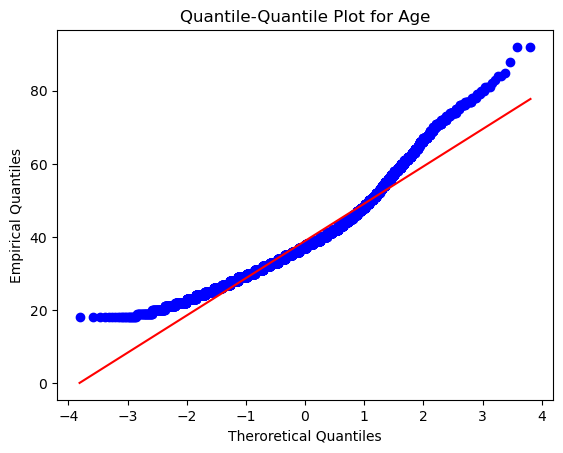

In [1691]:
stats.probplot(df['Age'], dist='norm', plot=plt)
plt.xlabel('Theroretical Quantiles')
plt.ylabel('Empirical Quantiles')
plt.title('Quantile-Quantile Plot for Age')
plt.show()


### Interpreting QQ-plot for Age
The plot shows that the distribution is positively skewed by the upward curve shaped.

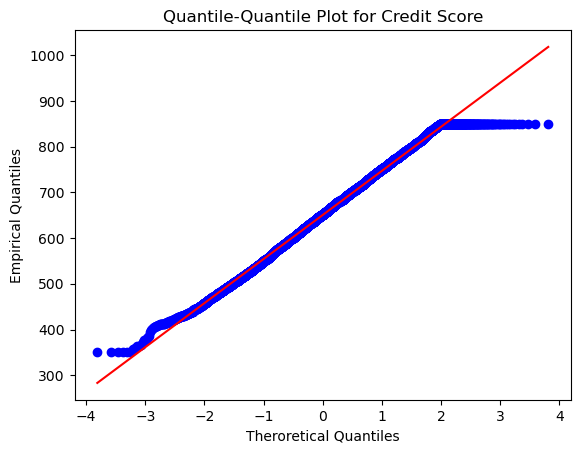

In [1692]:
stats.probplot(df['CreditScore'], dist='norm', plot=plt)
plt.xlabel('Theroretical Quantiles')
plt.ylabel('Empirical Quantiles')
plt.title('Quantile-Quantile Plot for Credit Score')
plt.show()


### Interpreting QQ-plot for Credit Score
The plot goes outwards horizontally at the 2nd theroretical quantile to the 4th theroretical quantile because the credit score of 850 being the highest credit score number and the density for the credit score of 850 is high.

### Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

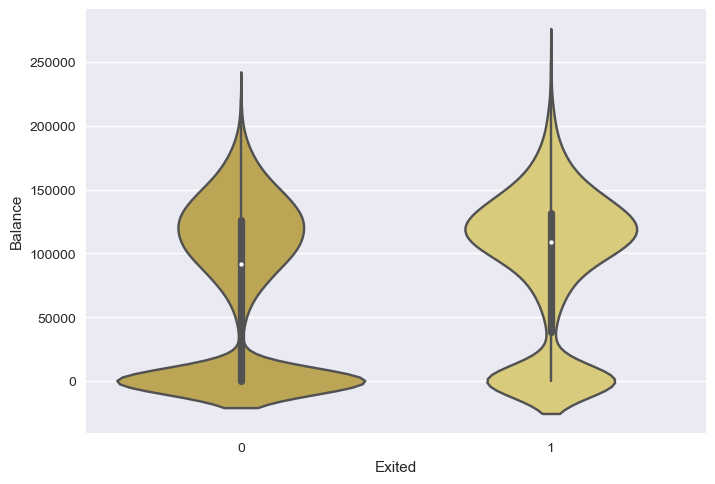

In [1719]:
sns.violinplot(df, x='Exited', y='Balance', palette=['#cdb045', '#e9d66c'])

Violin plot is chosen to show the biomodial distribution of Balance.

In [111]:
Q1_Bal_NotChurn = not_churn_df['Balance'].quantile(0.25)
Q2_Bal_NotChurn = not_churn_df['Balance'].quantile(0.50)
Q3_Bal_NotChurn = not_churn_df['Balance'].quantile(0.75)
IQR_NotChurn = Q3_Bal_NotChurn - Q1_Bal_NotChurn
print('Not Exited Balance')
print(f'Q1: {Q1_Bal_NotChurn}')
print(f'Q2: {Q2_Bal_NotChurn}')
print(f'Q3: {Q3_Bal_NotChurn}')
print(f'IQR: {IQR_NotChurn}')
Q1_Bal_Churn = churn_df['Balance'].quantile(0.25)
Q2_Bal_Churn = churn_df['Balance'].quantile(0.50)
Q3_Bal_Churn = churn_df['Balance'].quantile(0.75)
IQR_Churn = Q3_Bal_Churn - Q1_Bal_Churn
print('Exited Balance')
print(f'Q1: {Q1_Bal_Churn}')
print(f'Q2: {Q2_Bal_Churn}')
print(f'Q3: {Q3_Bal_Churn}')
print(f'IQR: {IQR_Churn}')

Not Exited Balance
Q1: 0.0
Q2: 92072.68
Q3: 126410.28
IQR: 126410.28
Exited Balance
Q1: 38340.02
Q2: 109349.29
Q3: 131433.33
IQR: 93093.31


### Age

<AxesSubplot:xlabel='Exited', ylabel='Age'>

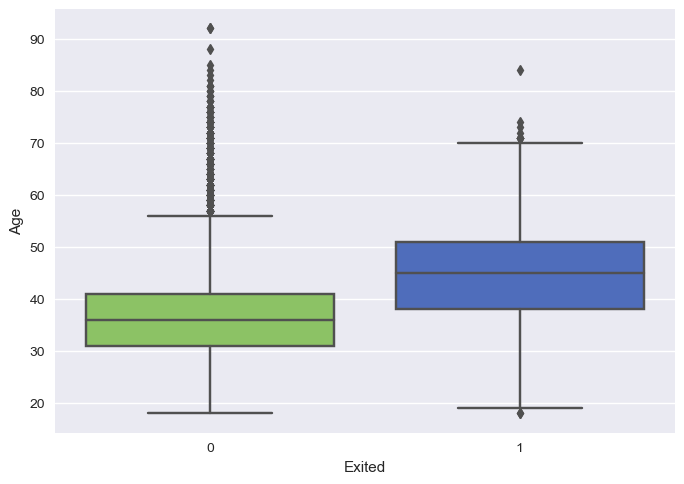

In [1720]:
sns.boxplot(df, x='Exited', y='Age', palette=['#89d255', '#3d65cd'])

In [162]:
Q1_Age_NotChurn = not_churn_df['Age'].quantile(0.25)
Q2_Age_NotChurn = not_churn_df['Age'].quantile(0.50)
Q3_Age_NotChurn = not_churn_df['Age'].quantile(0.75)
IQR_Age_NotChurn = Q3_Age_NotChurn - Q1_Age_NotChurn
print('Not Exited Age')
print(f'Q1: {Q1_Age_NotChurn}')
print(f'Q2: {Q2_Age_NotChurn}')
print(f'Q3: {Q3_Age_NotChurn}')
print(f'IQR: {IQR_Age_NotChurn}')
Q1_Age_Churn = churn_df['Age'].quantile(0.25)
Q2_Age_Churn = churn_df['Age'].quantile(0.50)
Q3_Age_Churn = churn_df['Age'].quantile(0.75)
IQR_Age_Churn = Q3_Age_Churn - Q1_Age_Churn
print('Exited Age')
print(f'Q1: {Q1_Age_Churn}')
print(f'Q2: {Q2_Age_Churn}')
print(f'Q3: {Q3_Age_Churn}')
print(f'IQR: {IQR_Age_Churn}')

Not Exited Age
Q1: 31.0
Q2: 36.0
Q3: 41.0
IQR: 10.0
Exited Age
Q1: 38.0
Q2: 45.0
Q3: 51.0
IQR: 13.0


### Credit Score

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

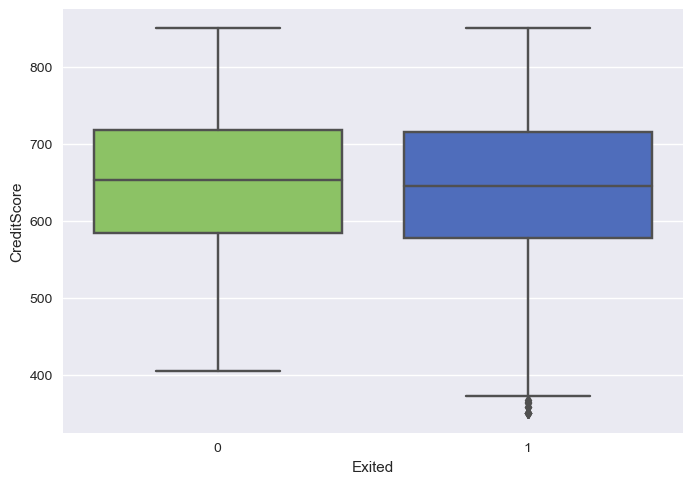

In [1721]:
sns.boxplot(df, x='Exited', y='CreditScore', palette=['#89d255', '#3d65cd'])

In [165]:
Q1_Cs_NotChurn = not_churn_df['CreditScore'].quantile(0.25)
Q2_Cs_NotChurn = not_churn_df['CreditScore'].quantile(0.50)
Q3_Cs_NotChurn = not_churn_df['CreditScore'].quantile(0.75)
IQR_Cs_NotChurn = Q3_Cs_NotChurn - Q1_Cs_NotChurn
print('Not Exited Credit Score')
print(f'Q1: {Q1_Cs_NotChurn}')
print(f'Q2: {Q2_Cs_NotChurn}')
print(f'Q3: {Q3_Cs_NotChurn}')
print(f'IQR: {IQR_Cs_NotChurn}')
Q1_Cs_Churn = churn_df['CreditScore'].quantile(0.25)
Q2_Cs_Churn = churn_df['CreditScore'].quantile(0.50)
Q3_Cs_Churn = churn_df['CreditScore'].quantile(0.75)
IQR_Cs_Churn = Q3_Cs_Churn - Q1_Cs_Churn
print('Exited Credit Score')
print(f'Q1: {Q1_Cs_Churn}')
print(f'Q2: {Q2_Cs_Churn}')
print(f'Q3: {Q3_Cs_Churn}')
print(f'IQR: {IQR_Cs_Churn}')

Not Exited Credit Score
Q1: 585.0
Q2: 653.0
Q3: 718.0
IQR: 133.0
Exited Credit Score
Q1: 578.0
Q2: 646.0
Q3: 716.0
IQR: 138.0


### Suspected Outliers

In [204]:
Upper_Fence_Balance_NotChurn = Q3_Bal_NotChurn + (1.7*IQR_NotChurn)
Lower_Fence_Balance_NotChurn = Q1_Bal_NotChurn - (1.7*IQR_NotChurn)
Upper_Fence_Age_NotChurn = Q3_Age_NotChurn + (1.7*IQR_Age_NotChurn)
Lower_Fence_Age_NotChurn = Q1_Age_NotChurn - (1.7*IQR_Age_NotChurn)
Upper_Fence_Cs_NotChurn = Q3_Cs_NotChurn + (1.7*IQR_Cs_NotChurn)
Lower_Fence_Cs_NotChurn = Q1_Cs_NotChurn - (1.7*IQR_Cs_NotChurn)
Upper_Fence_Balance_Churn = Q3_Bal_Churn + (1.7*IQR_Churn)
Lower_Fence_Balance_Churn = Q1_Bal_Churn - (1.7*IQR_Churn)
Upper_Fence_Age_Churn = Q3_Age_Churn + (1.7*IQR_Age_Churn)
Lower_Fence_Age_Churn = Q1_Age_Churn - (1.7*IQR_Age_Churn)
Upper_Fence_Cs_Churn = Q3_Cs_Churn + (1.7*IQR_Cs_Churn)
Lower_Fence_Cs_Churn = Q1_Cs_Churn - (1.7*IQR_Cs_Churn)

In [205]:
print(Upper_Fence_Balance_NotChurn)  
print(Lower_Fence_Balance_NotChurn) 
print(Upper_Fence_Age_NotChurn) 
print(Lower_Fence_Age_NotChurn) 
print(Upper_Fence_Cs_NotChurn) 
print(Lower_Fence_Cs_NotChurn) 
print(Upper_Fence_Balance_Churn)
print(Lower_Fence_Balance_Churn)
print(Upper_Fence_Age_Churn) 
print(Lower_Fence_Age_Churn) 
print(Upper_Fence_Cs_Churn)
print(Lower_Fence_Cs_Churn)

341307.756
-214897.476
58.0
14.0
944.1
358.9
289691.95699999994
-119918.60699999999
73.1
15.900000000000002
950.6
343.4


### Insights
Outliers for Balance and Credit Score are not in the range of the dataset.  
There are too many outliers for Age thus, it is preferred not to be removed.  

## Bivariate Analysis

### Numerical-Numerical Variables

In [318]:
corr_df = df

In [321]:
corr_df = corr_df.drop(columns=['CustomerId', 'Surname'])

In [322]:
corr_df

CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
1                  619    France  Female   42       2       0.00   
2                  608     Spain  Female   41       1   83807.86   
3                  502    France  Female   42       8  159660.80   
4                  699    France  Female   39       1       0.00   
5                  850     Spain  Female   43       2  125510.82   
...                ...       ...     ...  ...     ...        ...   
9996               771    France    Male   39       5       0.00   
9997               516    France    Male   35      10   57369.61   
9998               709    France  Female   36       7       0.00   
9999               772   Germany    Male   42       3   75075.31   
10000              792    France  Female   28       4  130142.79   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
RowNumber                                                                     
1                      1          1               1        101348.88       1  
2                      1          0               1        112542.58       0  
3                      3          1               0        113931.57       1  
4                      2          0               0         93826.63       0  
5                      1          1               1         79084.10       0  
...                  ...        ...             ...              ...     ...  
9996                   2          1               0         96270.64       0  
9997                   1          1               1        101699.77       0  
9998                   1          0               1         42085.58       1  
9999                   2          1               0         92888.52       1  
10000                  1          1               0         38190.78       0  

[10000 rows x 11 columns]

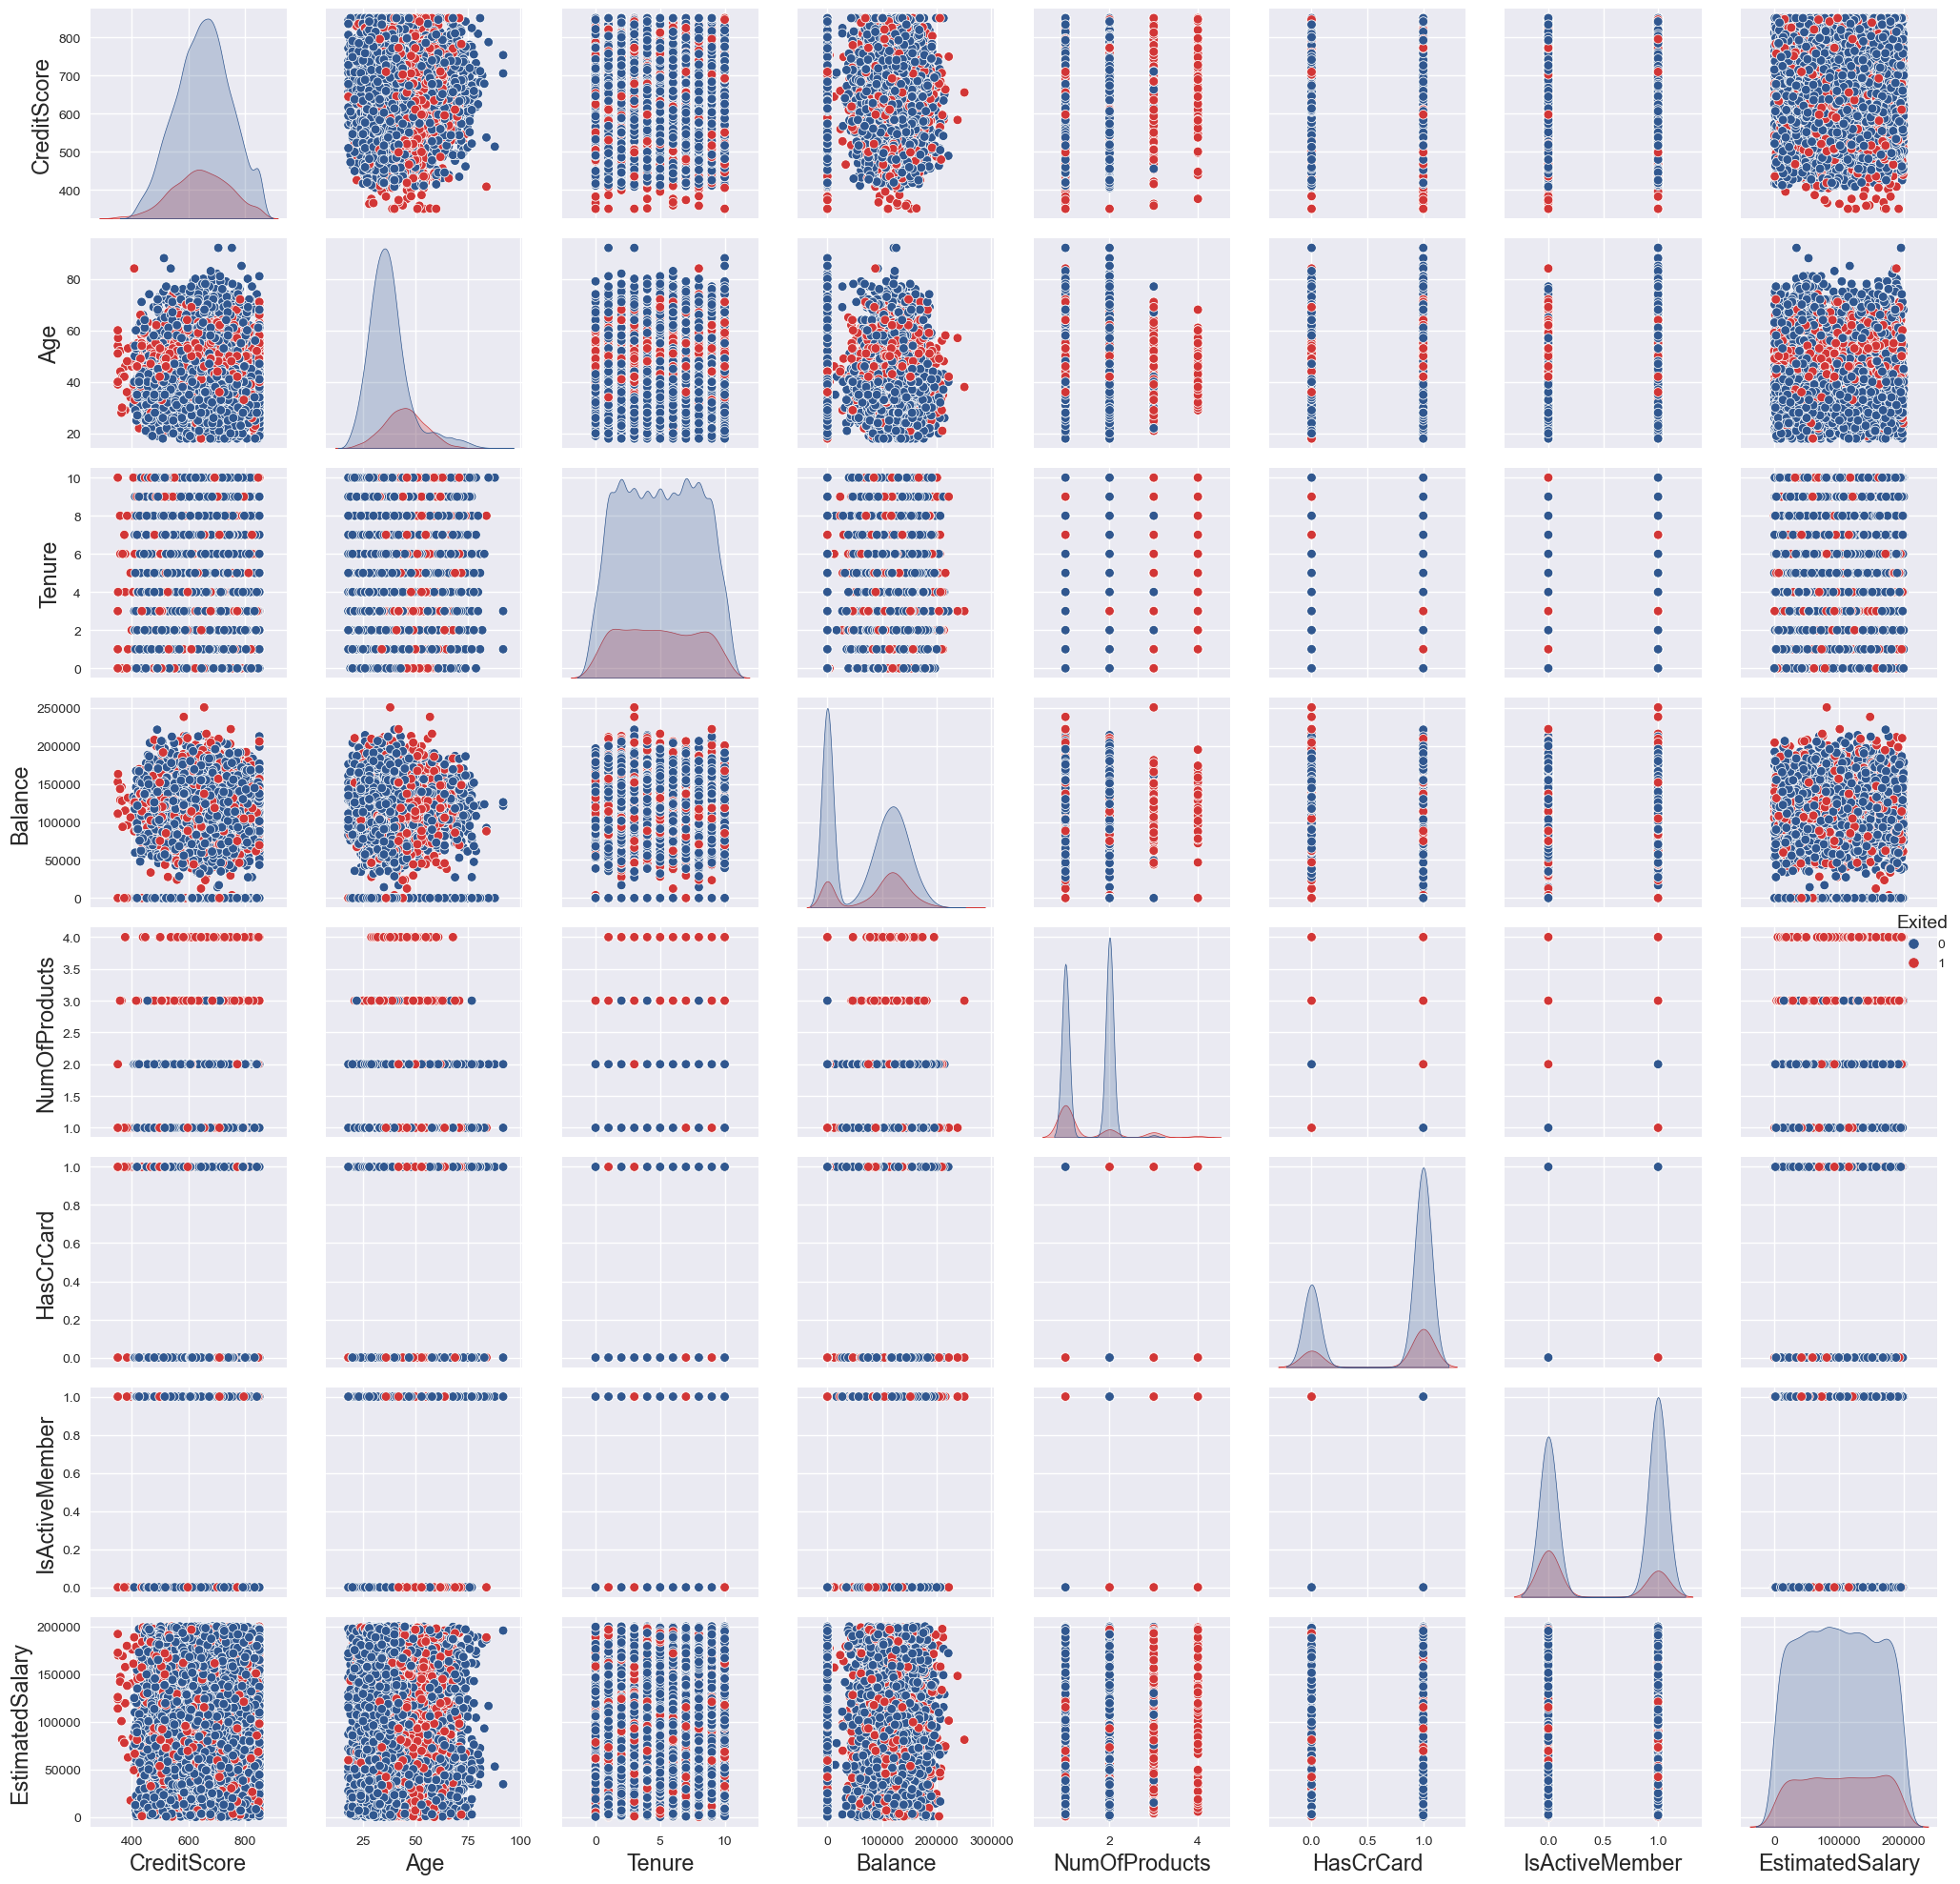

In [1745]:
sns.pairplot(corr_df , diag_kind='kde', hue='Exited', hue_order=[0, 1], palette=['#30578f','#d23636'])
plt.tight_layout()
plt.show()

### Linear Correlation

<AxesSubplot:>

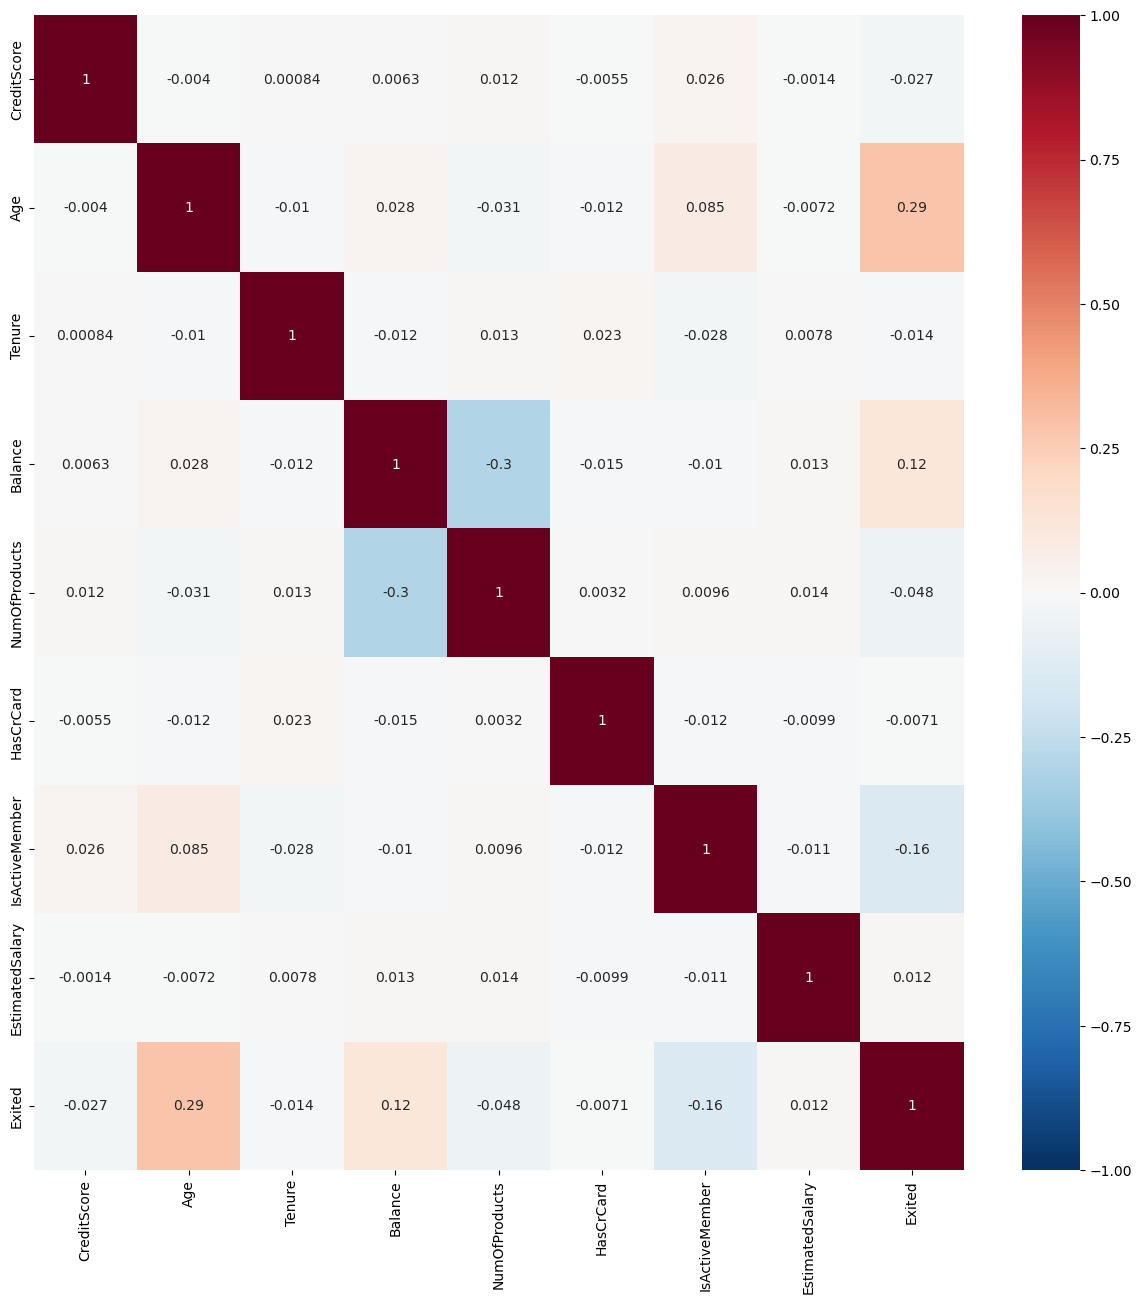

In [249]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

### Non-Linear Correlation

In [62]:
import phik

In [1540]:
interval_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'Exited']

<AxesSubplot:>

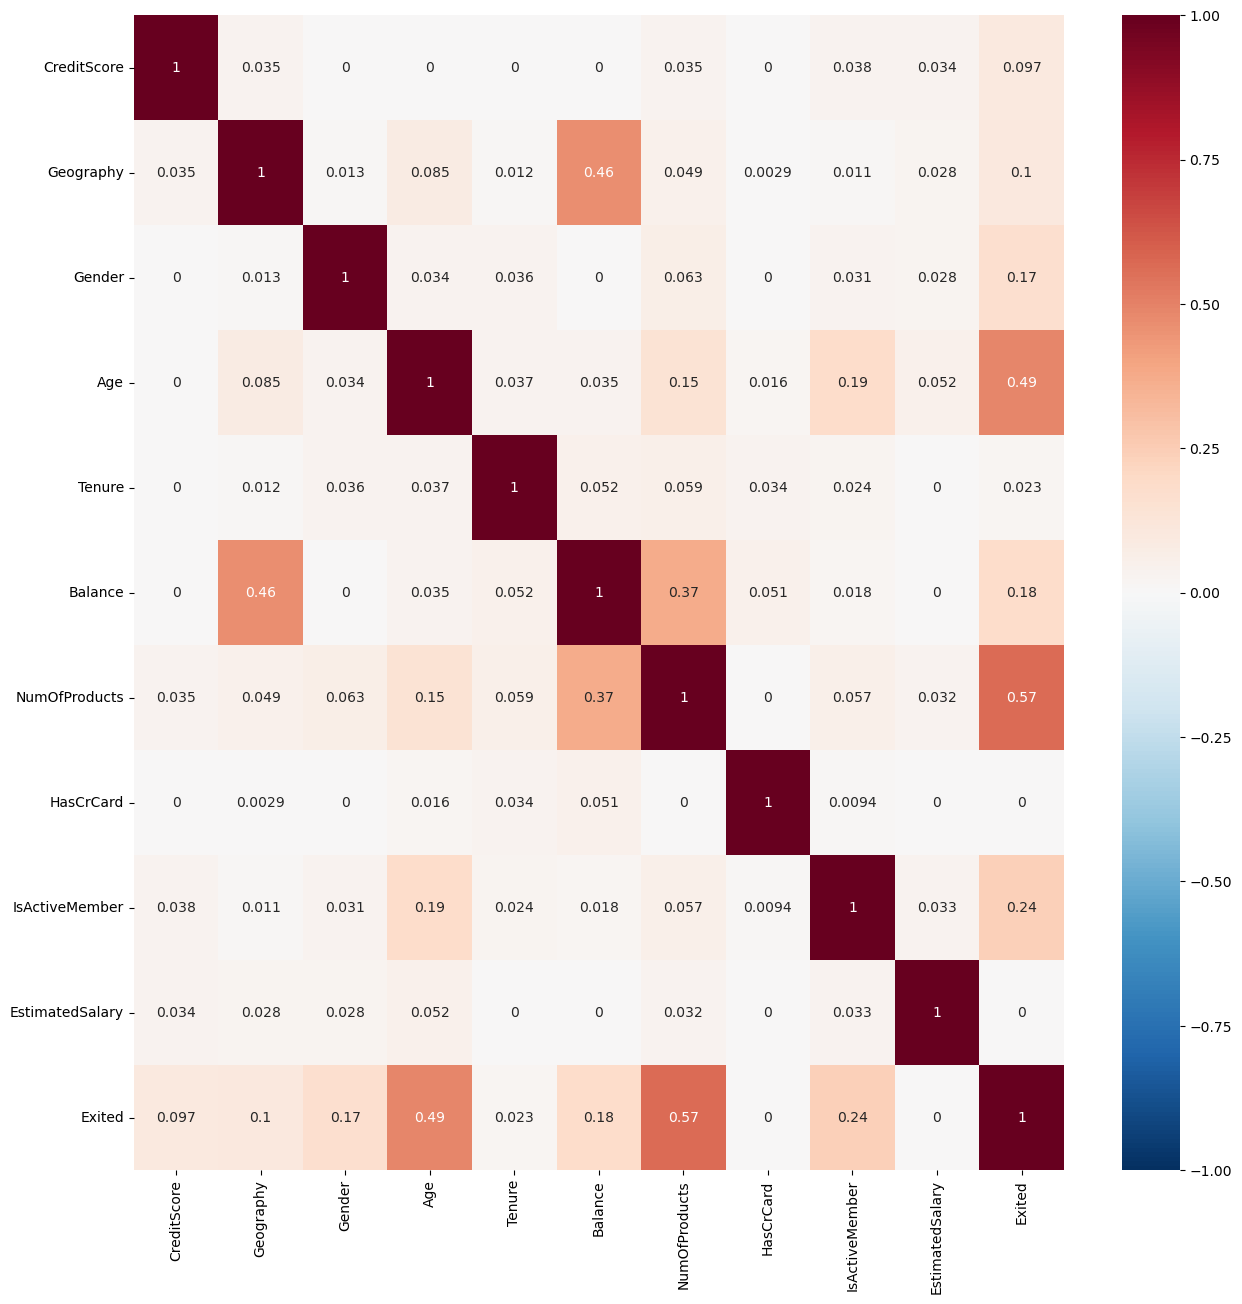

In [1541]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

### Categorical-Categorical Variables

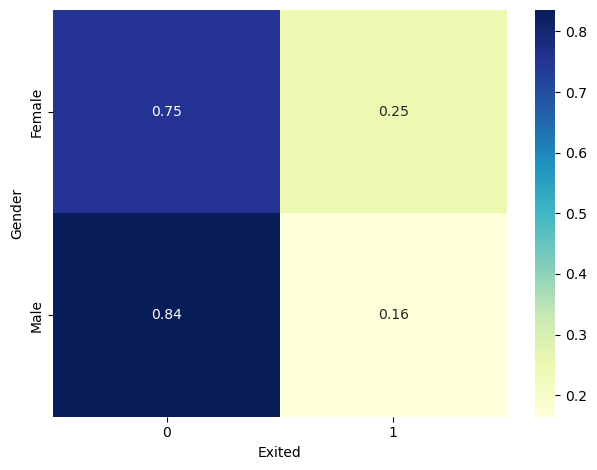

In [277]:
contingency = pd.crosstab(df['Gender'], df['Exited'], normalize='index')
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

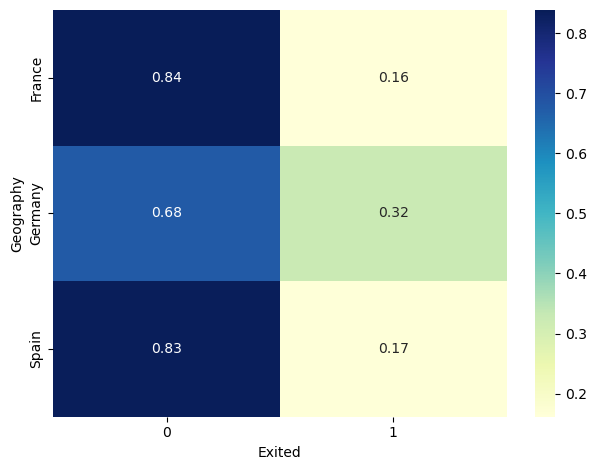

In [296]:
contingency_Geography = pd.crosstab(df['Geography'], df['Exited'], normalize='index')
sns.heatmap(contingency_Geography, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

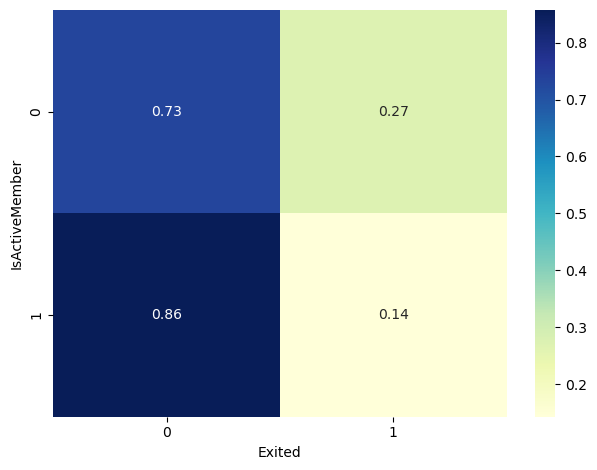

In [273]:
contingency_IsActiveMember = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')
sns.heatmap(contingency_IsActiveMember, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

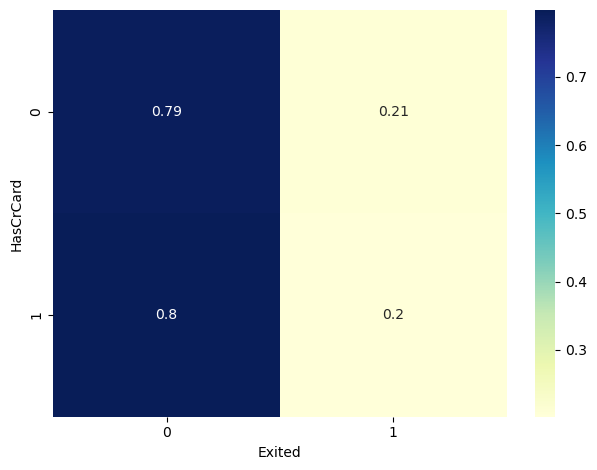

In [550]:
contingency_HasCrCard = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index')
sns.heatmap(contingency_HasCrCard, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

### Numerical-Categorical Features

In [1530]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df['Age'], df['Exited'])
ztest(df['EstimatedSalary'], df['Balance'])

(27.816269085175513, 2.7575764942537164e-170)

### Insights
We reject null hypothesis because the p-value is nearing 0 which is less than 0.05 and there is a significant difference.

## Multivariate Analysis

In [337]:
from factor_analyzer import FactorAnalyzer

In [1310]:
kmo_df = kmo_df.drop(columns=['Exited'])

In [1311]:
kmo_df

Age    Balance  NumOfProducts  IsActiveMember
RowNumber                                               
1           42       0.00              1               1
2           41   83807.86              1               1
3           42  159660.80              3               0
4           39       0.00              2               0
5           43  125510.82              1               1
...        ...        ...            ...             ...
9996        39       0.00              2               0
9997        35   57369.61              1               1
9998        36       0.00              1               1
9999        42   75075.31              2               0
10000       28  130142.79              1               0

[10000 rows x 4 columns]

In [1312]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(kmo_df)
kmo_model

0.5027700545888828

## Insights
kmo_model value is less than 0.6 therefore it is inadequate and factor analysis is not preferred.
However, I have continued to plot the Scree Plot.

In [1313]:
fa = FactorAnalyzer(rotation=None)
fa.fit(kmo_df)
ev, v = fa.get_eigenvalues()
ev

array([1.30981593, 1.08379562, 0.9105776 , 0.69581085])

In [1314]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(kmo_df)
chi_square_value, p_value

(1059.6405295245086, 1.1242144092467593e-225)

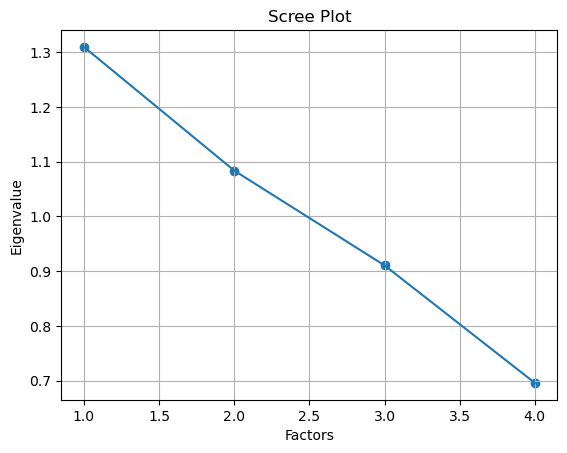

In [1315]:
plt.scatter(range(1,5),ev)
plt.plot(range(1,5),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Modelling

In [1351]:
feature_cols = ['Age', 'Balance', 'NumOfProducts', 'IsActiveMember']

In [1352]:
churn_df_sample = churn_df.sample(n=1600, random_state=42)

In [1353]:
not_churn_df_sample = not_churn_df.sample(n=6400, random_state=42)

In [1354]:
churn_df_sample

CustomerId          Surname  CreditScore Geography  Gender  Age  \
RowNumber                                                                    
3560         15727353           Ch'ang          650    France  Female   64   
544          15705953  Kodilinyechukwu          721     Spain    Male   51   
2456         15727490            Scott          661    France    Male   47   
2531         15598086            Brown          624    France  Female   45   
4564         15694376         Sullivan          705   Germany  Female   64   
...               ...              ...          ...       ...     ...  ...   
923          15753337           Yeates          555    France    Male   51   
5425         15566253          Manning          580   Germany    Male   44   
4733         15653937         McIntyre          638   Germany  Female   53   
9748         15775761    Iweobiegbunam          610   Germany  Female   69   
8164         15572050          Yefimov          768   Germany    Male   48   

           Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                                
3560            7  142028.36              1          1               0   
544             0  169312.13              1          1               0   
2456            5       0.00              1          0               1   
2531            3   68639.57              1          1               0   
4564            3  153469.26              3          0               0   
...           ...        ...            ...        ...             ...   
923             5       0.00              3          1               0   
5425            9  143391.07              1          0               0   
4733            1  123916.67              1          1               0   
9748            5   86038.21              3          0               0   
8164            3  122831.58              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
3560              32275.09       1  
544              109078.35       1  
2456             107243.31       1  
2531             168002.31       1  
4564             146573.66       1  
...                    ...     ...  
923              189122.89       1  
5425             146891.07       1  
4733              16657.68       1  
9748             192743.06       1  
8164              24533.89       1  

[1600 rows x 13 columns]

In [1355]:
not_churn_df_sample

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                      
8166         15813503  Pickering          606     Spain    Male   37       8   
6410         15690695      Flynn          683    France  Female   33       9   
2158         15750649     Uwakwe          744    France  Female   44       3   
1619         15662955   Nicholls          697    France    Male   27       8   
1634         15755868     Farmer          562    France    Male   35       7   
...               ...        ...          ...       ...     ...  ...     ...   
975          15705620         Lu          730    France    Male   34       5   
5592         15607509    Ozerova          539    France    Male   38       5   
7752         15588535      Ts'ao          750     Spain  Female   39       6   
7678         15711977      Finch          695    France    Male   36       4   
1196         15578866     Hughes          676    France  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
8166       154712.58              2          1               0   
6410            0.00              2          1               1   
2158            0.00              2          1               1   
1619       141223.68              2          1               0   
1634            0.00              1          0               0   
...              ...            ...        ...             ...   
975        122453.37              2          1               0   
5592            0.00              2          1               0   
7752            0.00              2          0               0   
7678       161533.00              1          1               0   
1196            0.00              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
8166              89099.18       0  
6410              38784.42       0  
2158             189016.14       0  
1619              90591.15       0  
1634              48869.67       0  
...                    ...     ...  
975              138882.98       0  
5592              47388.41       0  
7752              19264.33       0  
7678             100940.91       0  
1196              55119.53       0  

[6400 rows x 13 columns]

In [1356]:
churn_df_sample.Gender.replace(['Male', 'Female'], [0, 1], inplace=True)

In [1357]:
churn_df_sample.Geography.replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)

In [1358]:
churn_df_sample

CustomerId          Surname  CreditScore  Geography  Gender  Age  \
RowNumber                                                                     
3560         15727353           Ch'ang          650          0       1   64   
544          15705953  Kodilinyechukwu          721          2       0   51   
2456         15727490            Scott          661          0       0   47   
2531         15598086            Brown          624          0       1   45   
4564         15694376         Sullivan          705          1       1   64   
...               ...              ...          ...        ...     ...  ...   
923          15753337           Yeates          555          0       0   51   
5425         15566253          Manning          580          1       0   44   
4733         15653937         McIntyre          638          1       1   53   
9748         15775761    Iweobiegbunam          610          1       1   69   
8164         15572050          Yefimov          768          1       0   48   

           Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                                
3560            7  142028.36              1          1               0   
544             0  169312.13              1          1               0   
2456            5       0.00              1          0               1   
2531            3   68639.57              1          1               0   
4564            3  153469.26              3          0               0   
...           ...        ...            ...        ...             ...   
923             5       0.00              3          1               0   
5425            9  143391.07              1          0               0   
4733            1  123916.67              1          1               0   
9748            5   86038.21              3          0               0   
8164            3  122831.58              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
3560              32275.09       1  
544              109078.35       1  
2456             107243.31       1  
2531             168002.31       1  
4564             146573.66       1  
...                    ...     ...  
923              189122.89       1  
5425             146891.07       1  
4733              16657.68       1  
9748             192743.06       1  
8164              24533.89       1  

[1600 rows x 13 columns]

In [1359]:
not_churn_df_sample.Gender.replace(['Male', 'Female'], [0, 1], inplace=True)

In [1360]:
not_churn_df_sample.Geography.replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)

In [1361]:
not_churn_df_sample

CustomerId    Surname  CreditScore  Geography  Gender  Age  Tenure  \
RowNumber                                                                       
8166         15813503  Pickering          606          2       0   37       8   
6410         15690695      Flynn          683          0       1   33       9   
2158         15750649     Uwakwe          744          0       1   44       3   
1619         15662955   Nicholls          697          0       0   27       8   
1634         15755868     Farmer          562          0       0   35       7   
...               ...        ...          ...        ...     ...  ...     ...   
975          15705620         Lu          730          0       0   34       5   
5592         15607509    Ozerova          539          0       0   38       5   
7752         15588535      Ts'ao          750          2       1   39       6   
7678         15711977      Finch          695          0       0   36       4   
1196         15578866     Hughes          676          0       1   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
8166       154712.58              2          1               0   
6410            0.00              2          1               1   
2158            0.00              2          1               1   
1619       141223.68              2          1               0   
1634            0.00              1          0               0   
...              ...            ...        ...             ...   
975        122453.37              2          1               0   
5592            0.00              2          1               0   
7752            0.00              2          0               0   
7678       161533.00              1          1               0   
1196            0.00              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
8166              89099.18       0  
6410              38784.42       0  
2158             189016.14       0  
1619              90591.15       0  
1634              48869.67       0  
...                    ...     ...  
975              138882.98       0  
5592              47388.41       0  
7752              19264.33       0  
7678             100940.91       0  
1196              55119.53       0  

[6400 rows x 13 columns]

In [1362]:
train_sample = pd.concat([churn_df_sample, not_churn_df_sample])

In [1363]:
train_sample = train_sample.drop(columns=['CustomerId', 'Surname', 'HasCrCard', 'Tenure', 'EstimatedSalary'])

In [1364]:
train_sample

CreditScore  Geography  Gender  Age    Balance  NumOfProducts  \
RowNumber                                                                  
3560               650          0       1   64  142028.36              1   
544                721          2       0   51  169312.13              1   
2456               661          0       0   47       0.00              1   
2531               624          0       1   45   68639.57              1   
4564               705          1       1   64  153469.26              3   
...                ...        ...     ...  ...        ...            ...   
975                730          0       0   34  122453.37              2   
5592               539          0       0   38       0.00              2   
7752               750          2       1   39       0.00              2   
7678               695          0       0   36  161533.00              1   
1196               676          0       1   43       0.00              1   

           IsActiveMember  Exited  
RowNumber                          
3560                    0       1  
544                     0       1  
2456                    1       1  
2531                    0       1  
4564                    0       1  
...                   ...     ...  
975                     0       0  
5592                    0       0  
7752                    0       0  
7678                    0       0  
1196                    1       0  

[8000 rows x 8 columns]

In [1365]:
X_train = train_sample.loc[:, feature_cols]

In [1366]:
y_train = train_sample.Exited

### Logistic Regression

In [1200]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [1367]:
test = df.sample(n=2000, random_state=42)

In [1368]:
test.Gender.replace(['Male', 'Female'], [0, 1], inplace=True)

In [1369]:
test.Geography.replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)

In [1370]:
test = test.drop(columns = ['Gender', 'Geography', 'CreditScore'])

In [1371]:
test

CustomerId   Surname  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                                
6253         15687492  Anderson   32       3   96709.07              2   
4685         15736963   Herring   43       1       0.00              2   
1732         15721730    Amechi   44       4       0.00              2   
4743         15762134     Liang   59       8  119152.10              2   
4522         15648898    Chuang   27       7  124995.98              1   
...               ...       ...  ...     ...        ...            ...   
6413         15598982     Klein   53       5   98268.84              1   
8286         15572631  Ndubuisi   25      10       0.00              1   
7854         15746674    Miller   47       7       0.00              1   
1096         15689081        Wu   29       4       0.00              1   
6930         15651627     White   39       1  115341.19              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  
RowNumber                                                      
6253               0               0         41788.37       0  
4685               1               1        146379.30       0  
1732               1               0         58561.31       0  
4743               1               1        170679.74       0  
4522               1               1        114669.79       0  
...              ...             ...              ...     ...  
6413               0               1         45038.29       1  
8286               0               1        109895.16       0  
7854               1               0         33373.26       1  
1096               1               0         76755.99       1  
6930               1               1        107674.30       1  

[2000 rows x 10 columns]

In [1372]:
X_test = test.loc[:, feature_cols]

In [1811]:
X_test.shape

(2000, 4)

In [1374]:
y_test = test.Exited

In [1373]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1375]:
logreg_y_pred = logreg.predict(X_test)

In [1548]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [1377]:
logreg_accuracy = print(classification_report(y_test, logreg_y_pred))
logreg

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1607
           1       0.58      0.13      0.22       393

    accuracy                           0.81      2000
   macro avg       0.70      0.55      0.55      2000
weighted avg       0.77      0.81      0.76      2000



LogisticRegression(random_state=42)

### Decision Tree Classifier

In [1379]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
tree_y_pred = dt_clf.predict(X_test)

In [1380]:
tree_accuracy = print(classification_report(y_test, tree_y_pred))
tree_accuracy

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1607
           1       0.89      0.81      0.85       393

    accuracy                           0.94      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000



### XGBoost

In [1382]:
import xgboost as xgb

In [1383]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, eval_metric=['logloss', 'error'], verbose=True)

In [1509]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_y_pred = xgb_model.predict(X_test)

[22:23:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-logloss:0.54509	validation_0-error:0.13775	validation_1-logloss:0.54627	validation_1-error:0.13950
[1]	validation_0-logloss:0.46450	validation_0-error:0.13662	validation_1-logloss:0.46655	validation_1-error:0.13950
[2]	validation_0-logloss:0.41596	validation_0-error:0.13625	validation_1-logloss:0.41850	validation_1-error:0.13950
[3]	validation_0-logloss:0.38531	validation_0-error:0.13625	validation_1-logloss:0.38832	validation_1-error:0.13950
[4]	validation_0-logloss:0.36583	validation_0-error:0.13562	validation_1-logloss:0.36816	validation_1-error:0.13850
[5]	validation_0-logloss:0.35237	validation_0-error:0.13537	validation_1-logloss:0.35382	validation_1-error:0.13800
[6]	validation_0-logloss:0.34283	validation_0-error:0.13450	validation_1-logloss:0.34500	validation_1-error

In [1385]:
xgb_accuracy = print(classification_report(y_test, xgb_y_pred))
xgb_accuracy

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1607
           1       0.83      0.52      0.64       393

    accuracy                           0.88      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.88      0.88      0.87      2000



In [1386]:
results = xgb_model.evals_result()

In [1387]:
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

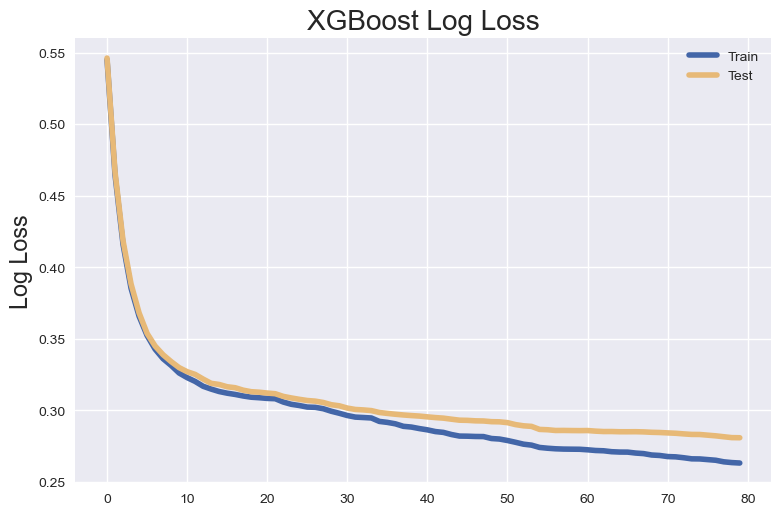

In [1746]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train', color='#4366a8')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test', color='#e7b977')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

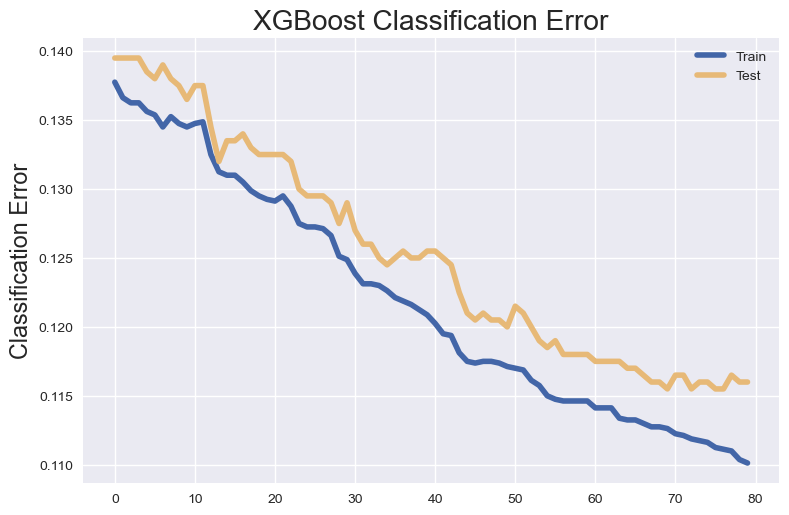

In [1747]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train', color='#4366a8')
ax.plot(x_axis, results['validation_1']['error'], label='Test', color='#e7b977')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Naive Bayes 

In [1390]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [1391]:
NB_y_pred = classifier.predict(X_test)

In [1392]:
NB_accuracy = print(classification_report(y_test, NB_y_pred))
NB_accuracy

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1607
           1       0.74      0.19      0.31       393

    accuracy                           0.83      2000
   macro avg       0.79      0.59      0.60      2000
weighted avg       0.81      0.83      0.78      2000



### Random Forest Classifier

In [1394]:
from sklearn.ensemble import RandomForestClassifier

In [1395]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [1396]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [1461]:
rf_y_pred = classifier_rf.predict(X_test)

In [1463]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [1397]:
classifier_rf.oob_score_

0.86

In [1398]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1399]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

### Grid Search

In [1400]:
from sklearn.model_selection import GridSearchCV

In [1401]:
grid_search = GridSearchCV(estimator=rf, param_grid = params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [1402]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [1464]:
grid_search_y_pred = grid_search.predict(X_test)

In [1465]:
print(classification_report(y_test, grid_search_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [1403]:
grid_search.best_score_

0.8603749999999999

In [1404]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=42)

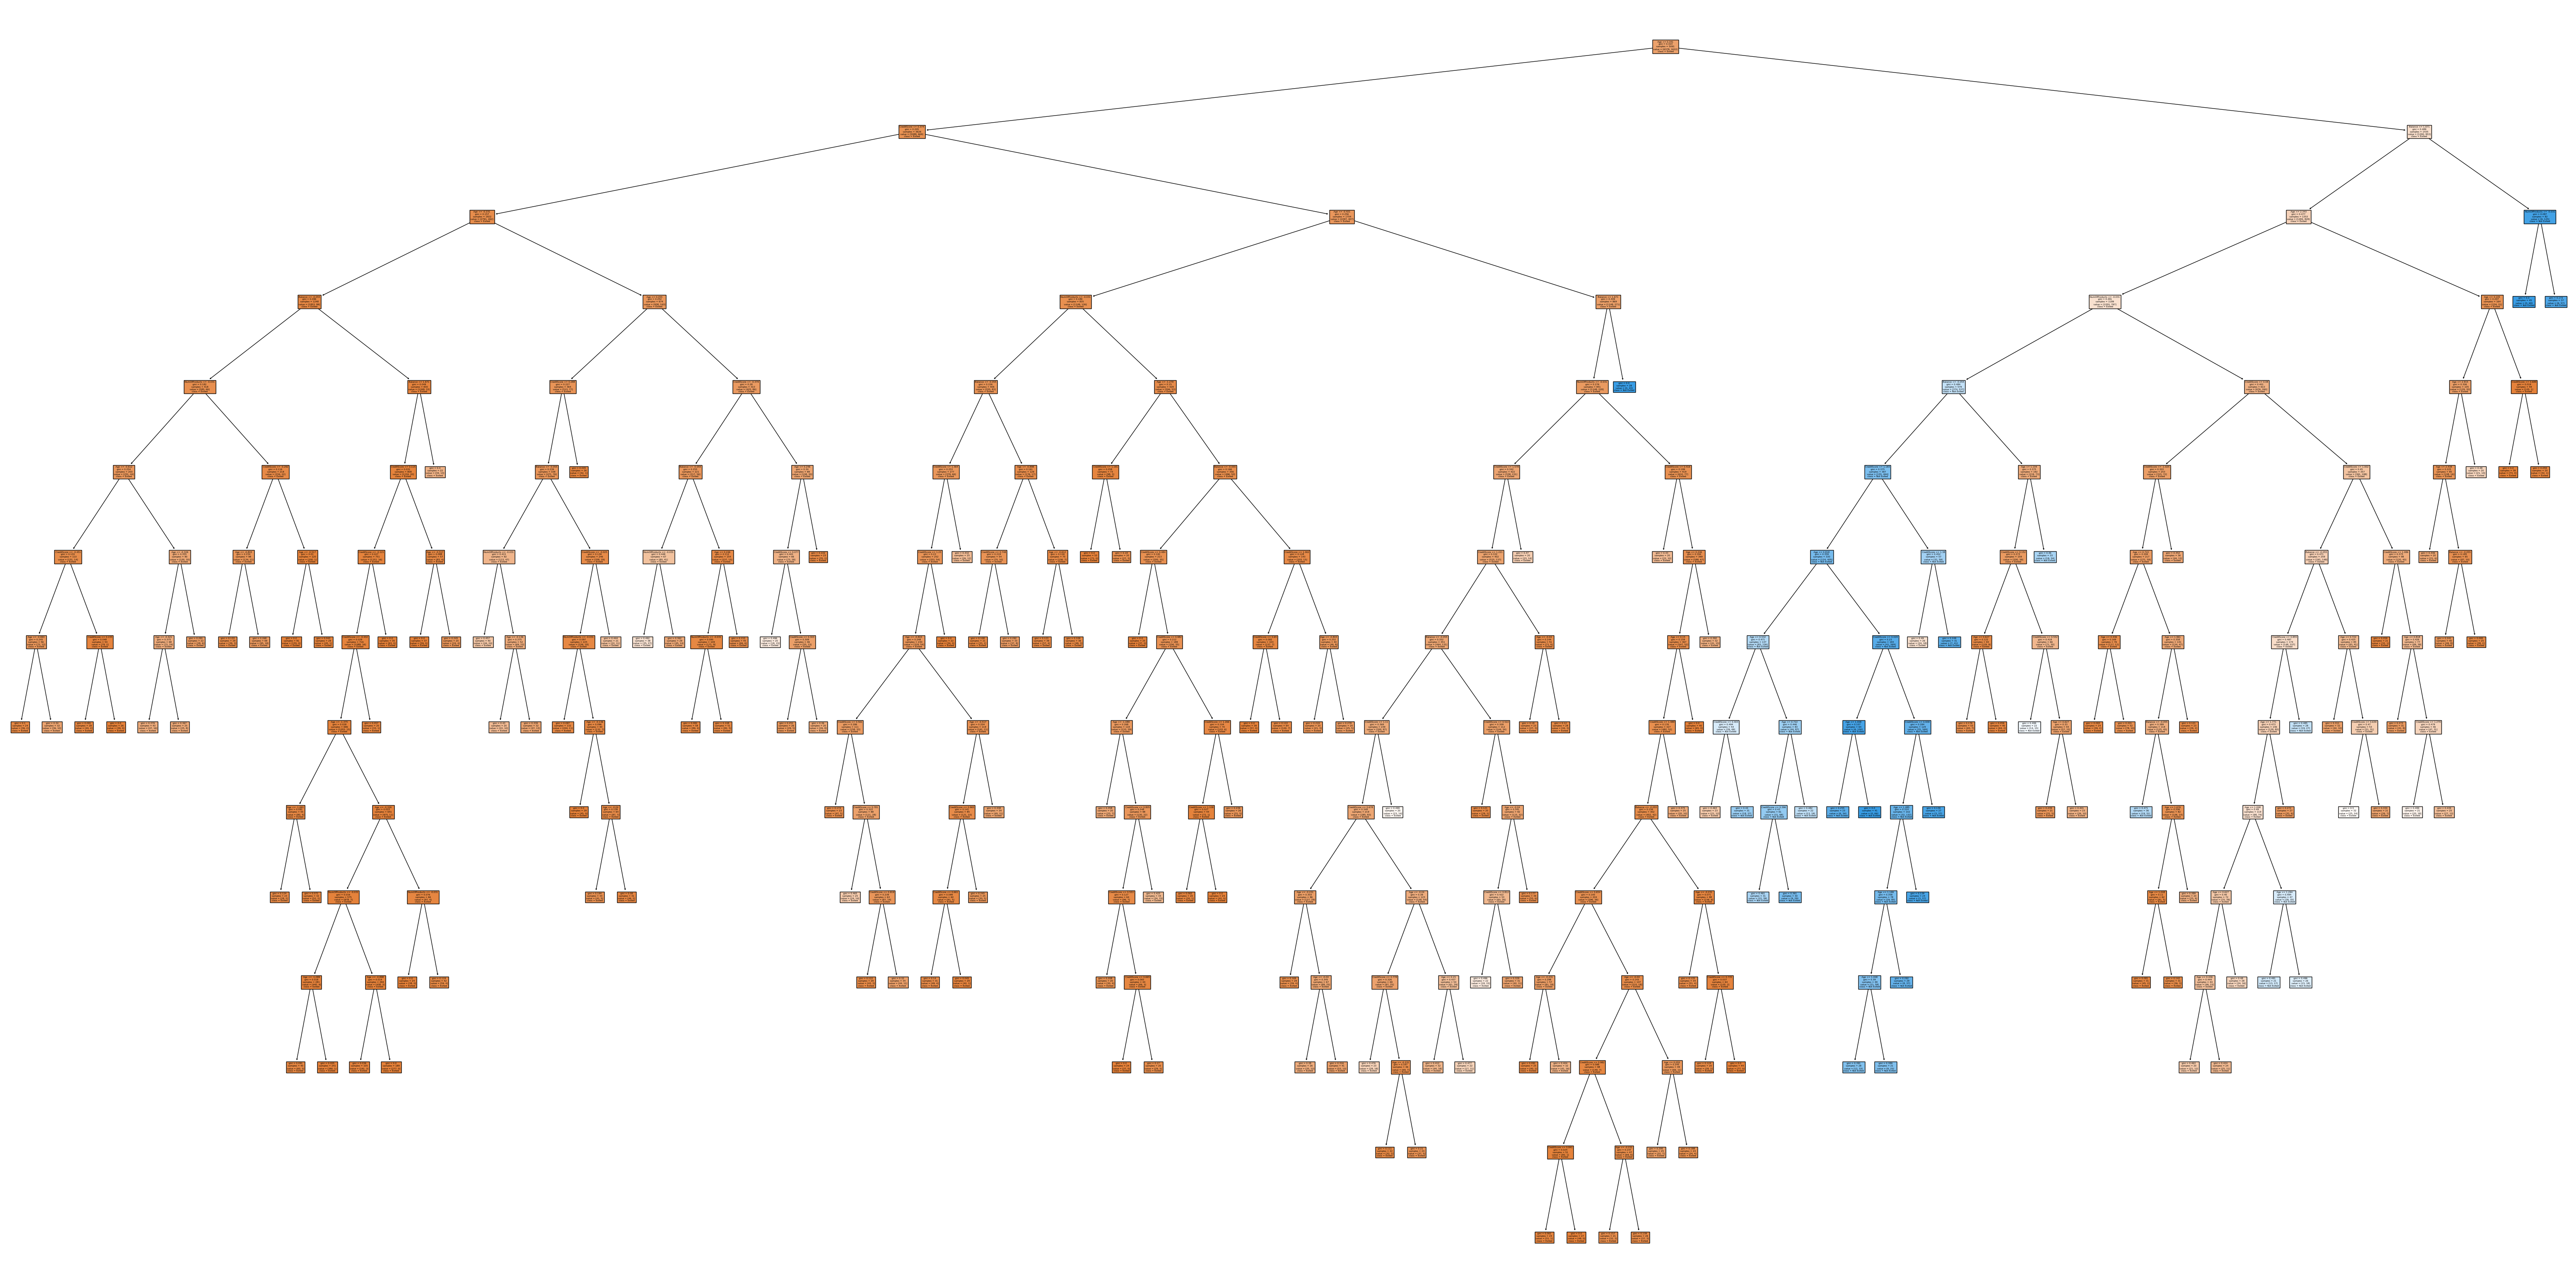

In [1405]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Exited', "Not Exited"],filled=True)
plt.show()

### Feature Importance

In [1406]:
rf_best.feature_importances_

array([0.45357652, 0.12354965, 0.32061379, 0.10226003])

In [1407]:
imp_df = pd.DataFrame({
    "Varname": feature_cols,
    "Imp": rf_best.feature_importances_
})

In [1408]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0             Age  0.453577
2   NumOfProducts  0.320614
1         Balance  0.123550
3  IsActiveMember  0.102260

In [1409]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
from boruta import BorutaPy
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10
)

In [1444]:
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	4
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 10
Confirmed: 	4
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=56,
                                         random_state=RandomState(MT19937) at 0x280B17BEC40),
         max_iter=10, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x280B17BEC40, verbose=2)

In [1411]:
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", feat_selector.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  Age  - Ranking:  1
Passes the test:  CreditScore  - Ranking:  1
Passes the test:  Balance  - Ranking:  1
Passes the test:  NumOfProducts  - Ranking:  1


### SVM 

In [1412]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)

SVC()

In [1413]:
svm_clf_y_pred = clf.predict(X_test)

In [1414]:
svm_accuracy = print(classification_report(y_test, svm_clf_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1607
           1       0.89      0.82      0.85       393

    accuracy                           0.94      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000



In [1415]:
from sklearn.metrics import recall_score
recall_score(y_test, svm_clf_y_pred)

0.816793893129771

### LGBM 

In [1420]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary', random_state=1)
lgbm.fit(X_train, y_train)
lgbm_y_pred = lgbm.predict(X_test)

In [1421]:
print(classification_report(y_test, lgbm_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.76      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Confusion Matrices

### LogReg Confusion Matrix

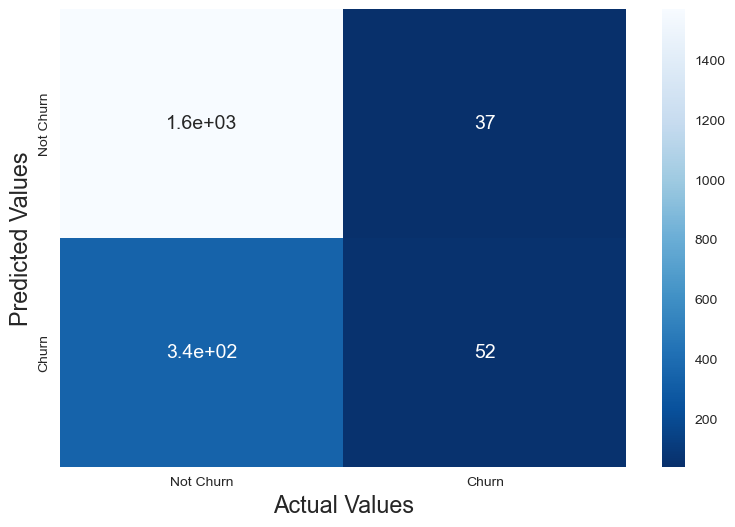

In [1758]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=logreg_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

### Decision Tree Classifier Confusion Matrix

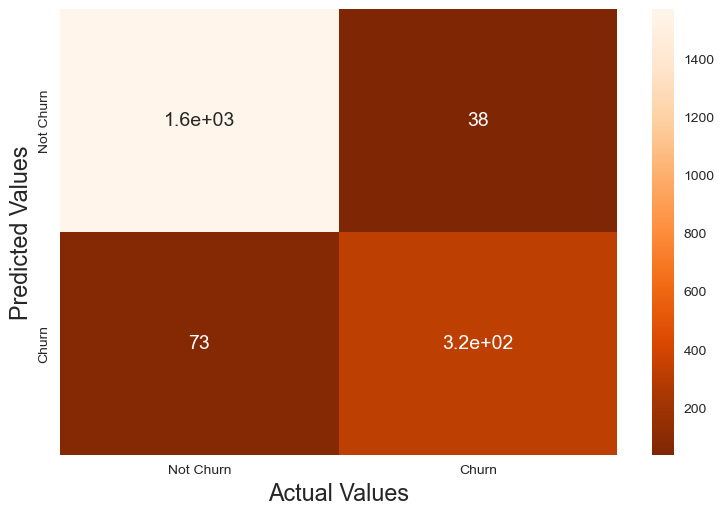

In [1757]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=tree_y_pred), annot=True, cmap='Oranges_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### XGBoost Confusion Matrix

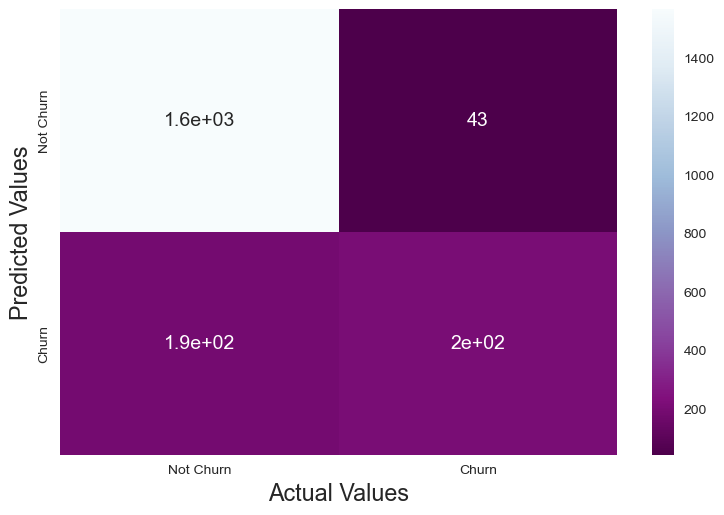

In [1759]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=xgb_y_pred), annot=True, cmap='BuPu_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Naive Bayes Confusion Matrix

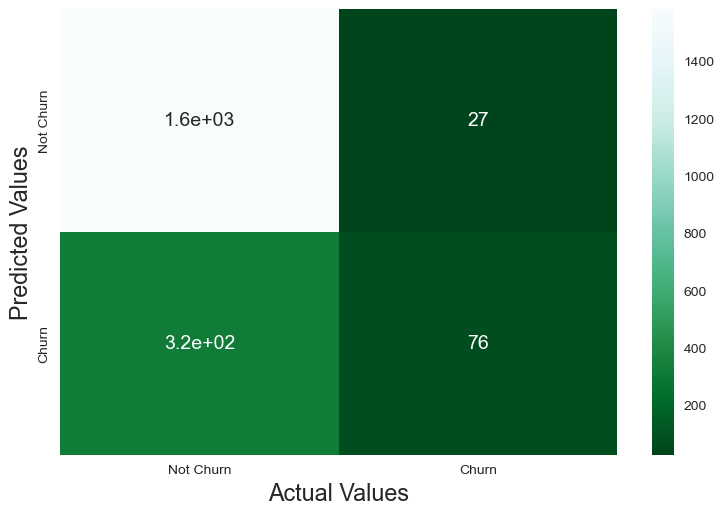

In [1763]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=NB_y_pred), annot=True, cmap='BuGn_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Random Forest Confusion Matrix

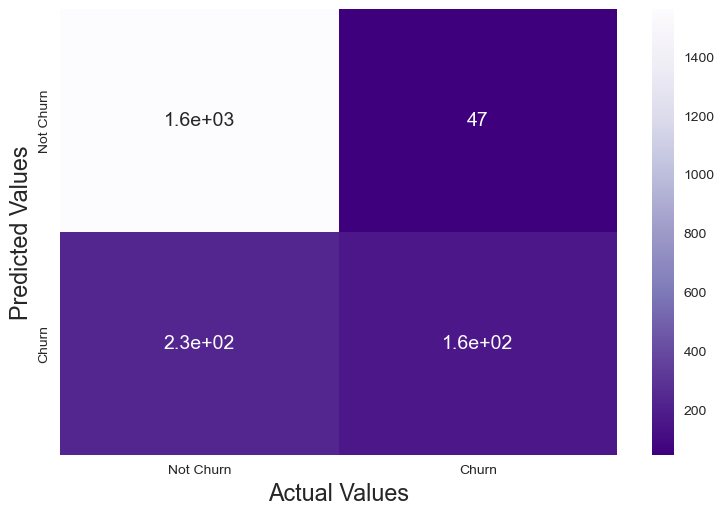

In [1764]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=rf_y_pred), annot=True, cmap='Purples_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Grid Search Confusion Matrix

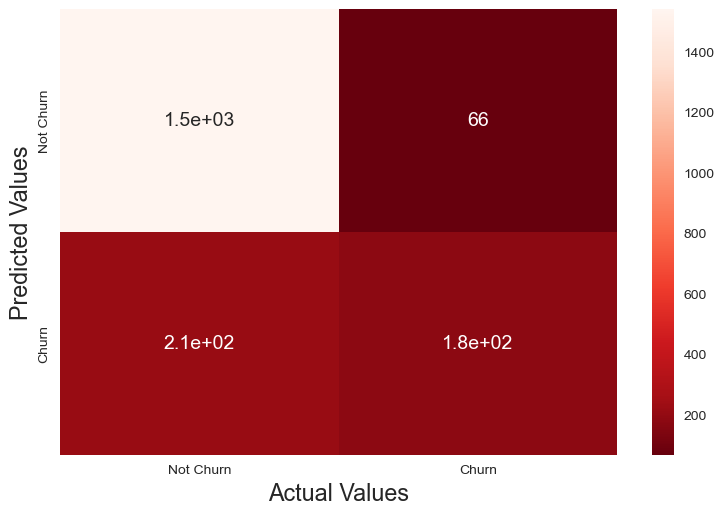

In [1765]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=grid_search_y_pred), annot=True, cmap='Reds_r', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### LGBM Confusion Matrix

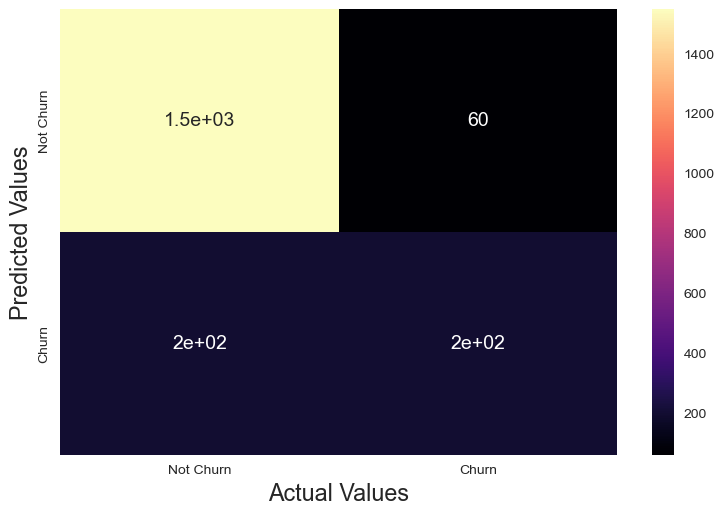

In [1766]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=lgbm_y_pred), annot=True, cmap='magma', xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Classification Scores

In [ ]:
models = ['LogReg', 'DecisionTree', 'XGB', 'NaiveBayes', 'RandomForest', 'GridSearch', 'Lgbm']
precision_score = [0.5842696629213483, 0.8938547486033519, 0.8266129032258065, 0.7378640776699029, 0.7729468599033816, 0.7317073170731707, 0.7647058823529411]
recall_score = [0.13231552162849872, 0.8142493638676844, 0.5216284987277354, 0.19338422391857507, 0.4071246819338422, 0.4580152671755725, 0.4961832061068702]
accuracy_score = [0.811, 0.9445, 0.8845, 0.828, 0.86, 0.8605, 0.871]

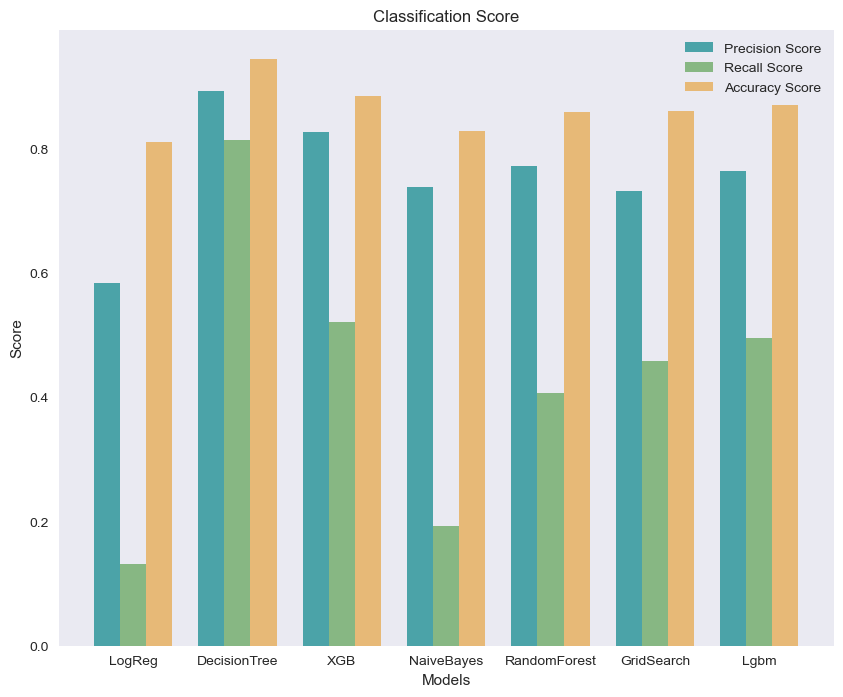

In [1738]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-dark')
X_axis = np.arange(len(models))
width = 0.25
plt.bar(X_axis, precision_score, 0.25, label = 'Precision Score', color='#4ba3a8')
plt.bar(X_axis + 0.25, recall_score, 0.25, label = 'Recall Score', color='#87b783')
plt.bar(X_axis + 0.25 * 2, accuracy_score, 0.25, label = 'Accuracy Score', color='#e7b977')
plt.xticks(X_axis+0.25, models)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Classification Score")
plt.legend(loc='upper right')
plt.show()

### Insights
The most accurate model is Decision Tree with 94.5% accuracy score followed by XGBoost and LGBM.

In [1702]:
pred_prob1 = dt_clf.predict_proba(X_test)
pred_prob2 = xgb_model.predict_proba(X_test)
pred_prob3 = lgbm.predict_proba(X_test)

In [1703]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [1705]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.93140775645989 0.9020340400062702 0.8926792927253697


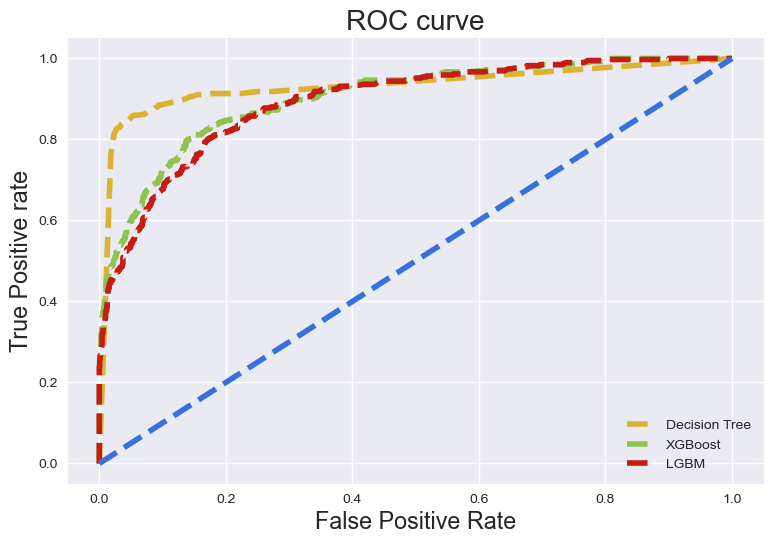

In [1742]:
plt.style.use('seaborn-darkgrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#dcb232', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='#8bc54e', label='XGBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='#c51c13', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='#3871dc')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

### Insights
AUC for the Decision Tree ROC curve is higher than that for the XGBoost and LGBM ROC curve. Therefore, Decision Tree is better at classifying the positive class in the dataset.  
AUC Score of Decision Tree, XGBoost and LGBM is 0.93, 0.90 and 0.89 respectively.    

## In Conclusion
#### Summary on Exploratory Data Analysis Insights
- There are more males than females. However, more females left the bank than males.  
- The greatest number of people that chose this bank are from France. However, more people in Germany left the bank.  
- More people are likely to leave the bank when they bought one product from the bank. The number of people that will leave the bank drastically decreases when they bought 2 products.  
- Those who have bought 3 or 4 products will certainly churn.  
- Active members are less likely to churn.  
- People who have very poor credit score of 300 to 400 are the most likely to churn whereas people with credit scores above 400 are less likely to churn.  
- Tenure of 6 to 8 years have the least likelihood of churn and Tenure of 1 year have the most likelihood of churn.  
- Overall, Short Tenure or Long Tenure does not have much impact on whether the people will churn or not churn.  
- Having a credit card or not having a credit card does not have much impact on whether the people will churn or not churn.  
- Outliers for Balance and Credit Score are not in the range of the dataset.  
- There are too many outliers for Age thus, it is preferred not to be removed.  
- kmo_model value is less than 0.6 therefore it is inadequate and factor analysis is not preferred.  
- None of the features are linearly correlated to one another.  
#### Summary on Modelling Insights
- Decision Tree Classifier is the best model to predict churn with an accuracy score of 94.5%, precision score of 89.4% and recall score of 81.4%.
- Decision Tree is the best at classifying the positive class in the dataset with AUC score of 93.1%.  
- XGBoost and LGBM are also good models to predict churn.  
- Decision Tree Classifier will be used for model deployment.  

## Saving Model for Deployment

In [1779]:
from sklearn.pipeline import Pipeline

In [1780]:
pipe = Pipeline([('sc', StandardScaler()), ('dt_clf', DecisionTreeClassifier())])

In [1781]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('dt_clf', DecisionTreeClassifier())])

In [1856]:
pipe_y_pred = pipe.predict(X_test)

In [1857]:
print(classification_report(y_test, pipe_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1607
           1       0.90      0.82      0.86       393

    accuracy                           0.95      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.94      0.95      0.95      2000



In [1791]:
import joblib
import pickle

In [1784]:
file = 'pipe.sav'

In [1785]:
joblib.dump(pipe, filename)

['saved_model.sav']

In [1793]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))